## ReAct Agent
Amazon Nova Pro used as a LLM model.
Here the model communicate with tool to get the time. For example:

I want to check the flights and their arrival time based on the Australian time.

Create model:

In [1]:
import boto3
import json
import logging

from langchain_aws import ChatBedrock
from langchain_core.output_parsers import StrOutputParser

boto3.set_stream_logger('', logging.ERROR)

# Initialize AWS Bedrock client
bedrock_client = boto3.client(
    service_name='bedrock-runtime'
    ,region_name='ap-southeast-2'
)

llm = ChatBedrock(
    client=bedrock_client,
    model_id="amazon.nova-pro-v1:0",  
    model_kwargs={
        "temperature": 0.3,  # Same temperature as original
        "maxTokenCount": 1000
    }
)

[Tavily - The Web Access Layer for AI Agents](https://www.tavily.com/) is a thrid party software. To access the Tavily servces, you need to load the API Keys.

In [ ]:
%load_ext dotenv
%dotenv ../../.env

From the LangChain communities you can find TavilySearchResults

In [16]:
from langchain_community.tools import TavilySearchResults
travily_search = TavilySearchResults(max_results=3)

Another custom tool using LangChain `tool` module:

> Important to note that Agent will read the doc string of the function. Please notice the second line of the following doc string.

In [17]:
from langchain.tools import tool
from datetime import datetime

@tool
def get_current_time(string: str) -> str:
    """
    Returns the current time. Use this for any questions related to knowing the time.
    Use this tool first for any time-based queires.
    """
    return f"The current time is {datetime.now().strftime('%H:%M:%S')}"

Define the ReAct agent and create LangChain graph:

In [ ]:
from langgraph.prebuilt import create_react_agent

tools = [travily_search, get_current_time]
graph = create_react_agent(llm, tools)

Visualise the graph we have created to execute:

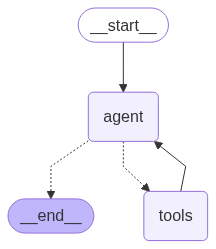

In [24]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [38]:
from IPython.display import Markdown

def render_in_markdown(text):
    display(Markdown(text))

Helper function to stream the agent's response back from each node

In [35]:
def process_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()
    return message    



In [36]:
def process_query(query):
    inputs = {"messages": [("user", query)]}
    message = process_stream(graph.stream(inputs, stream_mode="values"))
    render_in_markdown(message.content)

In [42]:
process_query("What is the current time in Sydney?")

================================ Human Message =================================

What is the current time in Sydney?
================================== Ai Message ==================================

[{'type': 'text', 'text': '<thinking> To determine the current time in Sydney, I need to use the `get_current_time` tool. I will specify the location as Sydney to get the accurate time. </thinking>\n'}, {'type': 'tool_use', 'name': 'get_current_time', 'input': {'string': 'Sydney'}, 'id': 'tooluse_F5C69PLOQhy7hnQ334I47A'}]
Tool Calls:
  get_current_time (tooluse_F5C69PLOQhy7hnQ334I47A)
 Call ID: tooluse_F5C69PLOQhy7hnQ334I47A
  Args:
    string: Sydney
================================= Tool Message =================================
Name: get_current_time

The current time is 11:55:14
================================== Ai Message ==================================

The current time in Sydney is 11:55:14.


The current time in Sydney is 11:55:14.

In [43]:
process_query("Who won the latest F1 race in Australia?")

================================ Human Message =================================

Who won the latest F1 race in Australia?
================================== Ai Message ==================================

[{'type': 'text', 'text': '<thinking> To determine who won the latest F1 race in Australia, I need to search for the most recent race results. I will use the `tavily_search_results_json` tool to find this information. </thinking>\n'}, {'type': 'tool_use', 'name': 'tavily_search_results_json', 'input': {'query': 'latest F1 race winner in Australia'}, 'id': 'tooluse_WS5rhkhtRsuKmA3961aRYg'}]
Tool Calls:
  tavily_search_results_json (tooluse_WS5rhkhtRsuKmA3961aRYg)
 Call ID: tooluse_WS5rhkhtRsuKmA3961aRYg
  Args:
    query: latest F1 race winner in Australia
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Australian Grand Prix", "url": "https://en.wikipedia.org/wiki/Australian_Grand_Prix", "content": "| Wins |

The latest F1 race in Australia, the 2025 Australian Grand Prix, was won by Lando Norris. Norris secured the victory ahead of Max Verstappen and George Russell. This win marked McLaren's first victory in Australia since Jenson Button's win in 2012.

In [44]:
process_query("What is the sunrise time for Sydney?")

================================ Human Message =================================

What is the sunrise time for Sydney?
================================== Ai Message ==================================

<thinking> To find the sunrise time for Sydney, I need to use the 'get_current_time' tool. However, this tool only provides the current time, not the sunrise time. I should inform the user that I cannot directly provide the sunrise time using the available tools. </thinking>

I cannot directly provide the sunrise time for Sydney using the available tools. The 'get_current_time' tool only provides the current time, not the sunrise time. You may need to check a weather website or use a dedicated tool for sunrise and sunset times.


<thinking> To find the sunrise time for Sydney, I need to use the 'get_current_time' tool. However, this tool only provides the current time, not the sunrise time. I should inform the user that I cannot directly provide the sunrise time using the available tools. </thinking>

I cannot directly provide the sunrise time for Sydney using the available tools. The 'get_current_time' tool only provides the current time, not the sunrise time. You may need to check a weather website or use a dedicated tool for sunrise and sunset times.

In [47]:
process_query("What is the time difference between Capital of Australi and Capital of Sri Lanka?")

================================ Human Message =================================

What is the time difference between Capital of Australi and Capital of Sri Lanka?
================================== Ai Message ==================================

[{'type': 'text', 'text': '<thinking> To determine the time difference between the capitals of Australia and Sri Lanka, I need to find out the current time in both capitals. The capital of Australia is Canberra, and the capital of Sri Lanka is Colombo. I will use the `get_current_time` tool to get the current time in both cities. </thinking>\n'}, {'type': 'tool_use', 'name': 'get_current_time', 'input': {'string': 'Canberra'}, 'id': 'tooluse_rBmVS8AOS4mBPkMbg0aMmQ'}, {'type': 'tool_use', 'name': 'get_current_time', 'input': {'string': 'Colombo'}, 'id': 'tooluse_9UblnmO1TEyRVRW_2WBWXw'}]
Tool Calls:
  get_current_time (tooluse_rBmVS8AOS4mBPkMbg0aMmQ)
 Call ID: tooluse_rBmVS8AOS4mBPkMbg0aMmQ
  Args:
    string: Canberra
  get_current_time (toolus

<thinking> Based on the search results, the current time in Canberra, Australia, is AEST (Australian Eastern Standard Time), which is UTC+10. The current time in Colombo, Sri Lanka, is IST (India Standard Time), which is UTC+5:30. To find the time difference, I need to subtract the UTC offset of Colombo from the UTC offset of Canberra. </thinking> 

The time difference between Canberra, Australia, and Colombo, Sri Lanka, is 4 hours and 30 minutes. Canberra is ahead of Colombo by 4 hours and 30 minutes.

In [50]:
process_query("What is the Quantas Flight No QF41 arrival time to Soekarno-Hatta International Airport in Australian time?")

================================ Human Message =================================

What is the Quantas Flight No QF41 arrival time to Soekarno-Hatta International Airport in Australian time?
================================== Ai Message ==================================

[{'type': 'text', 'text': '<thinking> To determine the arrival time of Quantas Flight No QF41 to Soekarno-Hatta International Airport in Australian time, I need to follow these steps:\n1. Find the scheduled arrival time of the flight in local time at Soekarno-Hatta International Airport.\n2. Convert this local time to Australian time, considering the time difference between Indonesia and Australia.\n3. To get the current time in Australia, I will use the `get_current_time` tool.\n4. To find the scheduled arrival time of the flight, I will use the `tavily_search_results_json` tool.\n\nFirst, I need to get the current time in Australia to calculate the time difference accurately. </thinking>\n'}, {'type': 'tool_use', 'na

<thinking> Based on the search results, the scheduled arrival time of Quantas Flight No QF41 to Soekarno-Hatta International Airport is 12:00 local time. To convert this to Australian time, I need to consider the time difference between Indonesia and Australia. 

Indonesia is generally 2 hours behind Australia. Therefore, the arrival time in Australian time would be 12:00 + 2 hours = 14:00 (2:00 PM). </thinking>

The scheduled arrival time of Quantas Flight No QF41 to Soekarno-Hatta International Airport in Australian time is 14:00 (2:00 PM).